In [1]:
from yaps.lib import int, real, uniform, bernoulli
import yaps as yaps

In [2]:
@yaps.model
def coin(x: int(lower=0, upper=1)[10]):
    theta: real(lower=0, upper=1) is uniform(0, 1)
    for i in range(10):
        x[i] is bernoulli(theta)

In [3]:
@yaps.model
def slicstan(N: int[10], y: real(lower=0, upper=1)[10]):
    tau: real is gamma(0.1, 0.1)
    mu: real is normal(0, 1)
    with transformed_parameters:
        sigma: real = pow(tau, (5 % 2))
    y is normal(mu, sigma)
    with generated_quantities:
        v: real = pow(sigma, 2)

In [4]:
print(slicstan)

data {
  int N[10];
  real<lower=0,upper=1> y[10];
}
parameters {
  real tau;
  real mu;
}
transformed parameters {
  real sigma = pow(tau,5/2);
}
model {
  tau ~ gamma(0.1,0.1);
  mu ~ normal(0,1);
  y ~ normal(mu,sigma);
}
generated quantities {
  real v = pow(sigma,2);
}



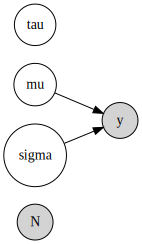

In [6]:
slicstan.graph